---

---

## Inicialización

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

Tamaño del conjunto de datos: (7591, 2)

Primeras filas del conjunto de datos:
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


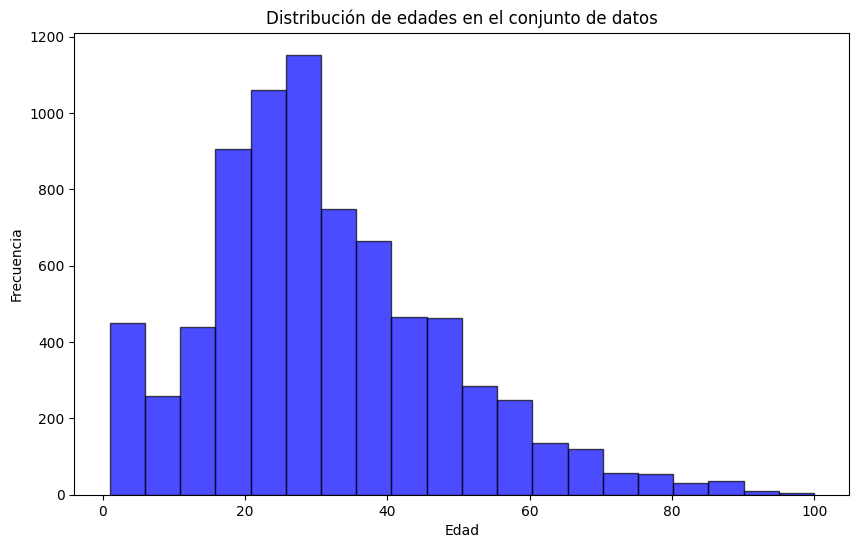

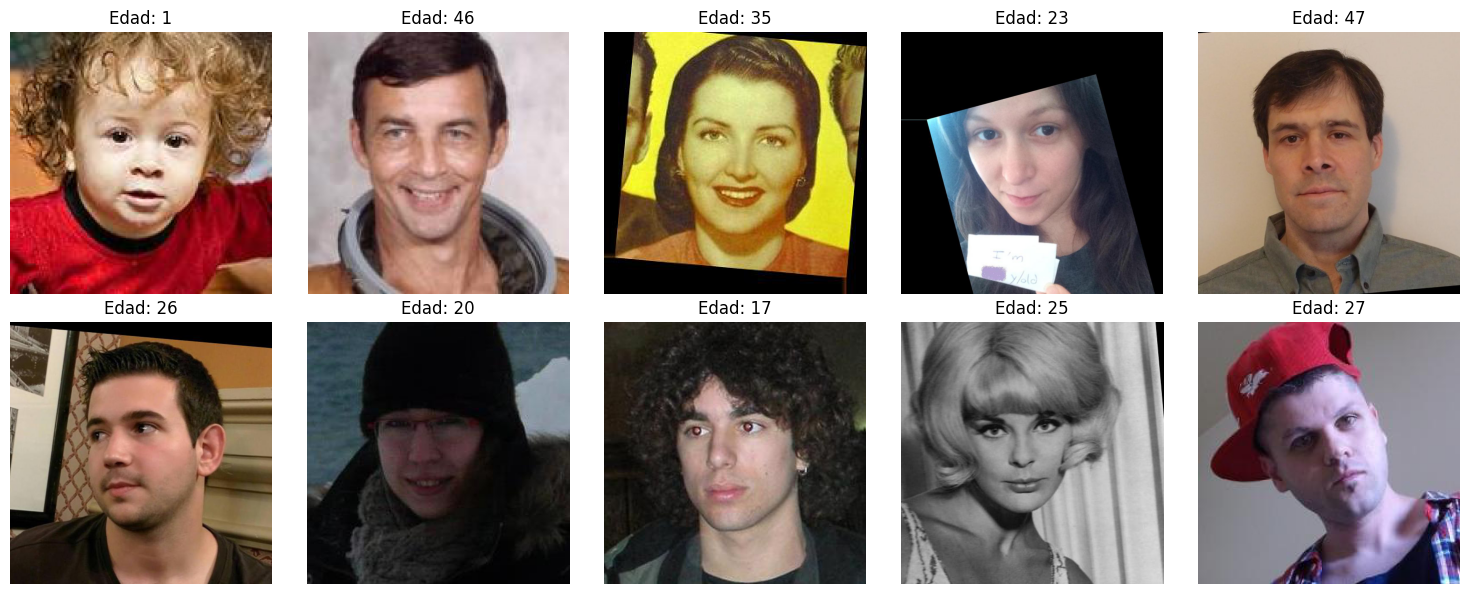

In [3]:
# Rutas proporcionadas
labels_path = '/datasets/faces/labels.csv'
images_path = '/datasets/faces/final_files/'

try:
    labels = pd.read_csv(labels_path)
    
    # 1. Tamaño del conjunto de datos
    dataset_size = labels.shape
    print(f"Tamaño del conjunto de datos: {dataset_size}")
    
    # Primeras filas del conjunto de datos
    print("\nPrimeras filas del conjunto de datos:")
    print(labels.head())
    
    # 2. Distribución de edad
    plt.figure(figsize=(10, 6))
    plt.hist(labels['real_age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribución de edades en el conjunto de datos')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # 3. Imprimir de 10 a 15
    sample_images = labels.sample(n=10, random_state=42)  # Seleccionar 10 imágenes aleatorias
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, (index, row) in enumerate(sample_images.iterrows()):
        image_path = os.path.join(images_path, row['file_name'])
        try:
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].set_title(f"Edad: {row['real_age']}")
            axes[i].axis('off')
        except Exception as e:
            axes[i].set_title("No cargó")
            axes[i].axis('off')
            print(f"No se pudo cargar la imagen: {image_path}. Error: {e}")
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"No se pudo cargar el archivo: {e}")
except Exception as e:
    print(f"Error durante el análisis: {e}")

## EDA


Valores nulos por columna:
file_name    0
real_age     0
dtype: int64

Estadísticas de resoluciones de imágenes:
             Width       Height
count  7591.000000  7591.000000
mean    464.733764   464.093927
std     330.834794   331.289883
min      47.000000    47.000000
25%     220.000000   220.000000
50%     385.000000   384.000000
75%     632.000000   632.000000
max    4466.000000  4466.000000


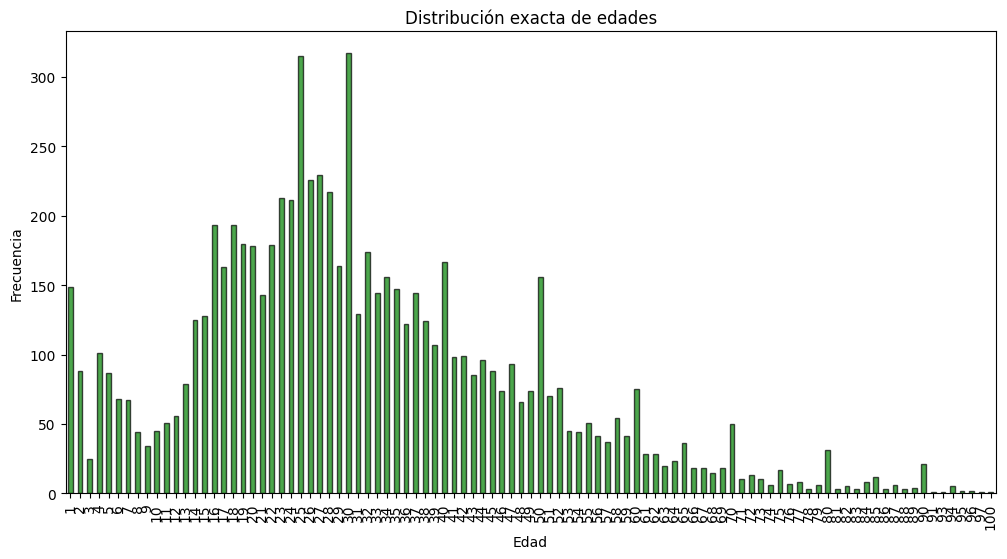

In [4]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(labels.isnull().sum())

# Resoluciones de imágenes
image_dimensions = []

for _, row in labels.iterrows():
    image_path = os.path.join(images_path, row['file_name'])
    try:
        with Image.open(image_path) as img:
            image_dimensions.append(img.size)  # Agregar dimensiones (ancho, alto)
    except Exception as e:
        print(f"No se pudo cargar la imagen: {image_path}. Error: {e}")

# Convertir a DataFrame para análisis
dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])
print("\nEstadísticas de resoluciones de imágenes:")
print(dimensions_df.describe())

# Distribución por edad
age_distribution = labels['real_age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
age_distribution.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Distribución exacta de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Columnas disponibles en el conjunto de datos:
Index(['file_name', 'real_age'], dtype='object')


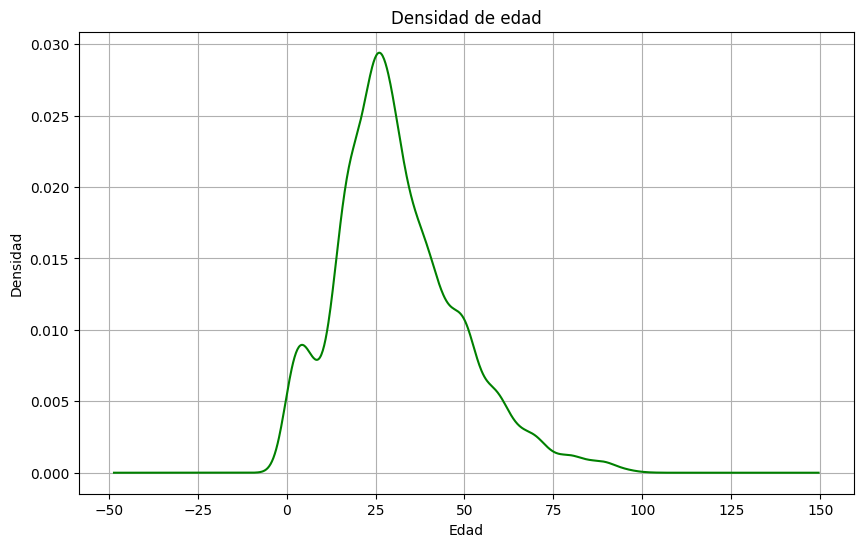


Número de registros duplicados: 0

Balance de datos por rangos de edad:
19-30    33.882229
31-45    24.766170
0-18     22.342247
46-60    13.133974
61+       5.875379
Name: age_group, dtype: float64


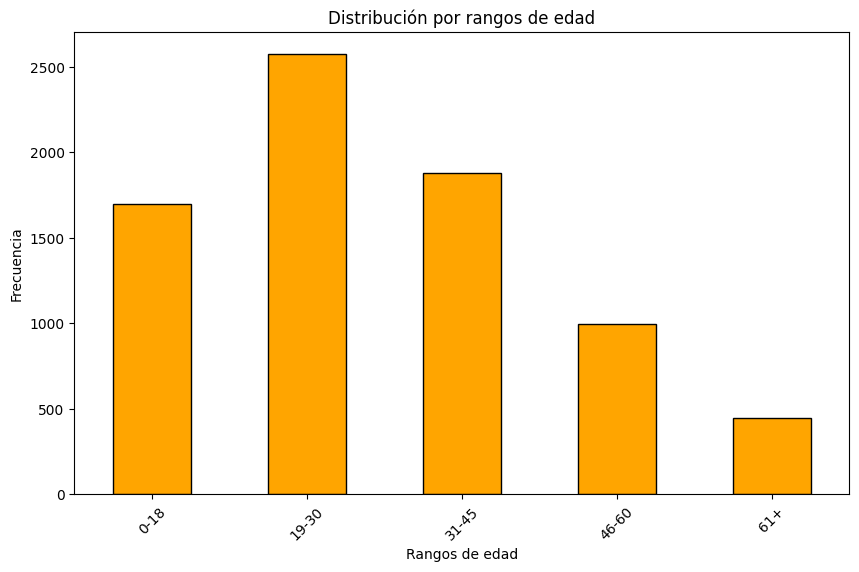

In [5]:
# Verificar si hay otras columnas para análisis adicionales
print("\nColumnas disponibles en el conjunto de datos:")
print(labels.columns)

# 1. Calcular correlaciones si existen más columnas numéricas
if labels.select_dtypes(include=['float64', 'int64']).shape[1] > 1:
    print("\nMatriz de correlación entre variables numéricas:")
    print(labels.corr())
    
    # Visualizar matriz de correlación si hay suficientes columnas numéricas
    plt.figure(figsize=(8, 6))
    corr_matrix = labels.corr()
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Matriz de correlación")
    plt.show()

# 2. Si existe una columna de género u otra categórica
if 'gender' in labels.columns:
    print("\nDistribución por género:")
    print(labels['gender'].value_counts())
    
    plt.figure(figsize=(6, 4))
    labels['gender'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Distribución por género')
    plt.xlabel('Género')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# 3. Visualización de densidad de edad
plt.figure(figsize=(10, 6))
labels['real_age'].plot(kind='kde', color='green')
plt.title('Densidad de edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Matriz de correlación
if labels.select_dtypes(include=['float64', 'int64']).shape[1] > 1:
    print("\nMatriz de correlación entre variables numéricas:")
    print(labels.corr())

# Duplicados
duplicados = labels.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicados}")

# Balance del conjunto de datos
bins = [0, 18, 30, 45, 60, 100]
labels['age_group'] = pd.cut(labels['real_age'], bins=bins, labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Balance del conjunto de datos por rangos de edad
print("\nBalance de datos por rangos de edad:")
print(labels['age_group'].value_counts(normalize=True) * 100)

# Visualización del balance por rangos de edad
plt.figure(figsize=(10, 6))
labels['age_group'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribución por rangos de edad')
plt.xlabel('Rangos de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Conclusiones

**Tamaño del conjunto de datos:**  
El conjunto de datos consta de **7,591 imágenes** con sus respectivas edades reales.

**Edades:**  
- Las edades en el conjunto de datos están distribuidas de manera variada, con un pico en el rango de **19-30 años**, representando el **33.88% del total**.  
- El rango de edades menos representado es el de **61 años o más**, con solo un **5.87%**.

**Valores faltantes:**  
- No se encontraron valores nulos en las columnas `file_name` y `real_age`.

**Resoluciones de las imágenes:**  
Las resoluciones de las imágenes varían significativamente:  
- **Ancho promedio:** 464 píxeles.  
- **Altura promedio:** 464 píxeles.  
- **Mínimo:** 47 píxeles.  
- **Máximo:** 4,466 píxeles.  

**Duplicados:**  
- No se encontraron registros duplicados en el conjunto de datos.

**Balance del conjunto de datos:**  
- Aunque el conjunto de datos no está perfectamente balanceado entre los rangos de edad, no presenta un desbalance extremo.

**Representatividad del conjunto de datos:**  
- El conjunto de datos parece lo suficientemente diverso en términos de edades y resoluciones para entrenar un buen modelo.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [13]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
def load_data(path, subset='training'):
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))

    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        horizontal_flip=True,
        rotation_range=15
    )

    data_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files/'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset=subset,
        seed=12345
    )

    return data_gen_flow

In [15]:
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', input_shape=input_shape, include_top=False)
    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='relu')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='mse',
        metrics=['mae']
    )
    return model

In [16]:
def train_model(model, train_data, test_data, epochs=10):
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=train_data.samples // train_data.batch_size,
        validation_steps=test_data.samples // test_data.batch_size,
        verbose=2
    )
    return model, history

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [17]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

### Resultados del Entrenamiento del Modelo

**Imágenes validadas:**
- Entrenamiento: `6073` imágenes
- Validación: `1518` imágenes

---

**Épocas de entrenamiento:**

- **Epoch 1/3**
    ```
    /usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
    self._warn_if_super_not_called()
    379/379 - 1467s - 4s/step - loss: 359.1868 - mae: 14.6037 - val_loss: 286.4670 - val_mae: 13.3697
    ```

- **Epoch 2/3**
    ```
    /usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
    self.gen.throw(typ, value, traceback)
    379/379 - 7s - 18ms/step - loss: 173.1814 - mae: 11.6093 - val_loss: 394.3358 - val_mae: 16.5963
    ```

- **Epoch 3/3**
    ```
    379/379 - 1501s - 4s/step - loss: 307.9423 - mae: 13.5519 - val_loss: 287.3769 - val_mae: 13.4272
    ```

---

**Avisos:**

- **Modelo guardado exitosamente:**
    ```
    WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
    ```

## Conclusiones

El modelo trabaja de una forma muy lenta aun con GPU de Google Colab, teniendo un valor de predicción algo bajo pero que muestra que si esta teniendo un nivel de aprendizaje, el moe